# <center>  Основы NLP </center>
<center><img src="https://miro.medium.com/max/2672/1*_Nb5AADlqVQJDa0YyNFKGA.jpeg"></center>
<p style="text-align: right;"><em>Aвтор:</em> Ян Шинкевич, Алла Тетерукова</p>

## <center> Часть 2. Векторизация. Методы схожести текстовых данных

### <center> 1. Векторизация

**Векторизация** - преобразование текстовых данных в вектора, которые впоследствии используются для работы с машинным обучением.<br>
Векторизация, пожалуй, является одним из важнейших этапов в предобработке текстовых данных. 
Качество работы <i>моделей машинного обучения</i> <u>напрямую</u> зависит от качества векторного представления данных (в нашем случае, текста)

<font color='black'>**Идея контекстуальной схожести**</font> - слова, встречающиеся в одинаковом контексте, имеют одинаковое значение

**2 типа векторов**:
<ul>
    <li> Bag of Words (не основаны на идее контекстуальной схожести)</li>
    <li> Word Embeddings (основаны на идее контекстуальной схожести) </li>
</ul>



### <center>**Bag of Words**</center>

Общеприняты 3 типа построения BoW: *OHE (binary), Count Encoding (frequency), TF-IDF <br>*
И то, и другое, и третье в одну строку нам позволяет сделать библиотека **sklearn** и соответствующие методы

Есть корпус текстов, состоящий из трех документов (предложений):

In [2]:
corpus = ['Майк любит играть в футбол. Майк и футбол = <3.',
          'Майк и футбол = <3!',
          'А Екатерина любит после работы поспать. Ну и повекторизировать тексты.']

Нам нужно всё это дело векторизировать. Поехали!<br><br><br><br>
Для начала построим функцию **plot_vectors**, которая нам визуально будет отображать наши вектора (однако вдумываться в её содержание не нужно, она просто реализует визуализацию):<br> 

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(X):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X.todense()).transpose()
    origin = [0], [0] # origin point
    plt.xlabel('X')
    plt.ylabel('y')
    Q1 = plt.quiver(*origin, reduced[0,0], reduced[1,0], color='blue', scale=5);
    Q2 = plt.quiver(*origin, reduced[0,1], reduced[1,1], color='red', scale=5);
    Q3 = plt.quiver(*origin, reduced[0,2], reduced[1,2], color='green', scale=5);

    plt.legend([Q1,Q2,Q3],['Sentence 1','Sentence 2', 'Sentence 3'])



### 1) One hot encoding (Binary)


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True) # создаём векторизатор, указываем параметр "binary" = True (бинарные вектора) 
X = vectorizer.fit_transform(corpus) # векторизируем корпус

print("Признаки нашего корпуса (уникальные слова):")
print(*vectorizer.get_feature_names(), sep=' | ')

Признаки нашего корпуса (уникальные слова):
екатерина | играть | любит | майк | ну | повекторизировать | после | поспать | работы | тексты | футбол


Обратите внимание на то, что CountVectorizer всё самостоятельно протокенизировал, убрал знаки препинания и понизил шрифт. В настройках параметров можно убрать эту "самостоятельность".<br><br>
**А теперь посмотрим, как наши предложения векторизировались (заметьте, что единицы в векторах точно соответствуют порядку фичей сверху):**

In [5]:
print(*[f'{i} --> {vector}' for i,vector in zip(corpus, X.toarray())], sep='\n')

Майк любит играть в футбол. Майк и футбол = <3. --> [0 1 1 1 0 0 0 0 0 0 1]
Майк и футбол = <3! --> [0 0 0 1 0 0 0 0 0 0 1]
А Екатерина любит после работы поспать. Ну и повекторизировать тексты. --> [1 0 1 0 1 1 1 1 1 1 0]


Соответственная визуализация векторов в пространстве:

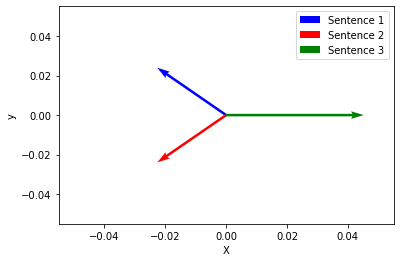

In [6]:
plot_vectors(X)

Приглашаю вас самостоятельно повекторизировать :) Ничего сложного, только копипаст! (но, плиз, осознанный) <br>
Векторизируйте 3 данных предложения (находящихся в списке <b>task_1</b>) методом <em>One-Hot Encoding</em>:

In [8]:
task_1 = ['Теория — это когда все известно, но ничего не работает.', 
          'Практика — это когда все работает, но никто не знает почему.',
          'Мы объединяем теорию и практику: ничего не работает... и никто не знает почему!'] # (с) Эйнштейн

In [10]:
# создаём векторизатор с параметром "binary = True"
vectorizer = CountVectorizer(binary=True)
# векторизируем наш корпус (task_1)
task_1_vectorized = vectorizer.fit_transform(task_1)

Смотрим красоту:

In [11]:
print(*[f'{i} --> {vector}' for i,vector in zip(task_1, task_1_vectorized.toarray())], sep='\n')

Теория — это когда все известно, но ничего не работает. --> [1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1]
Практика — это когда все работает, но никто не знает почему. --> [1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1]
Мы объединяем теорию и практику: ничего не работает... и никто не знает почему! --> [0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0]


### 2) Frequency Encoding


In [12]:
vectorizer_count = CountVectorizer() # указываем параметр "binary" = False (векторизатор считает частоты)
X = vectorizer_count.fit_transform(corpus)
print(*[f'{i} --> {vector}' for i,vector in zip(corpus, X.toarray())], sep='\n')

Майк любит играть в футбол. Майк и футбол = <3. --> [0 1 1 2 0 0 0 0 0 0 2]
Майк и футбол = <3! --> [0 0 0 1 0 0 0 0 0 0 1]
А Екатерина любит после работы поспать. Ну и повекторизировать тексты. --> [1 0 1 0 1 1 1 1 1 1 0]


Соответственная визуализация векторов в пространстве:

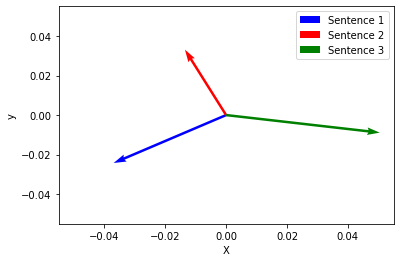

In [13]:
plot_vectors(X)

Tеперь провекторизируйте те же предложения, только методом <em>Frequency Encoding</em>:<br>

In [14]:
task_2 = ['Теория — это когда все известно, но ничего не работает.', 
          'Практика — это когда все работает, но никто не знает почему.',
          'Мы объединяем теорию и практику: ничего не работает... и никто не знает почему!'] # (с) Эйнштейн

In [ ]:
# создаём векторизатор с параметром "binary = Fasle"
vectorizer = 
# векторизируем наш корпус (task_2)
task_2_vectorized = 

Отличаются вектора от предыдущих One-Hot Encoding?

In [ ]:
print(*[f'{i} --> {vector}' for i,vector in zip(task_2, task_2_vectorized.toarray())], sep='\n')

### 3) Term Frequency - Inversed Document Frequency


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer() # создание векторизатора (применяется формула tf-idf)
X = vectorizer_tfidf.fit_transform(corpus) # векторизация корпуса
print(*[f'{i} --> \n{vector}' for i,vector in zip(corpus, X.toarray())], sep='\n')

##### Обратите внимание, что 4-ая позиция в векторе, отвечающая за слово "Майк" имеет самое высокое значение. Почему? 


Соответственная визуализация векторов в пространстве:

In [ ]:
plot_vectors(X)

**Как видим, визуально 3 типа <i>BoW векторов</i> практически не отличаются, за исключением их длины. <br>Однако нужно помнить, что визуализация в данном конкретном случае априори даёт поверхностные результаты ввиду малого размера корпуса и снижения размерностей с N-D до 2D. <br> Визуализация здесь призвана взглянуть на данные беспристрастно, без глубокого анализа и выводов.
На практике и вычислениях 3 типа векторов могут давать ощутимо разные результаты, например, в Машинном Обучении.** <br><br><br>

Ну и напоследок провекторизируйте тот же текст методом <em>TF-IDF</em>:<br>

In [ ]:
task_3 = ['Теория — это когда все известно, но ничего не работает.', 
          'Практика — это когда все работает, но никто не знает почему.',
          'Мы объединяем теорию и практику: ничего не работает... и никто не знает почему!'] # (с) Эйнштейн

In [ ]:
# создаём векторизатор
vectorizer = 
# векторизируем наш корпус (task_3)
task_3_vectorized = 

Наши TF-IDF вектора :)

In [ ]:
print(*[f'{i} --> {vector}' for i,vector in zip(task_3, task_3_vectorized.toarray())], sep='\n')

**Просмотрите 3 вида графика(про Майка и Екатерину). Как видим, визуально 3 типа <i>BoW векторов</i> практически не отличаются, за исключением их длины.<br>Однако нужно помнить, что визуализация в данном конкретном случае априори даёт поверхностные результаты ввиду малого размера корпуса и снижения размерностей с N-D до 2D. <br> Визуализация здесь призвана взглянуть на данные беспристрастно, без глубокого анализа и выводов.
На практике и вычислениях 3 типа векторов могут давать ощутимо разные результаты, например, в Машинном Обучении.** <br><br><br>

### <center> Word Embeddings

В данном уроке мы научимся строить один из видов Word Embeddings - **GloVe** <br>
Реализовать данный тип векторов можно двумя способами: использовать заранее натренированные вектора (pretrained) либо же натренировать собственные вектора на своём корпусе текста.<br>
Используем заранее натренированные вектора, предварительно их скачав.<br>

Для различных манипуляций с Word Embeddings используется библиотека **gensim**.<br>
Тут сразу мы можем использовать gensim.downloader, который позволяет скачать готовые натренированные вектора. <br>
Команда ниже покажет список <i>pretrained vectors</i>, которые мы можем скачать.

In [17]:
import gensim.downloader as api
api.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

Скачаем вектора **GloVe** ("glove-twitter-50"). <br>
<i>P.S.</i> Цифра в названии обозначает размерность векторов (в нашем случае, это 50 размерностей)

In [18]:
glove_model = api.load('glove-twitter-50')

С таким же успехом можно скачать любые вектора из списка, например **Word2Vec** ("word2vec-google-news-300") и использовать их. <br><br><br>

Чтобы посмотреть вектор отдельно взятого слова, выполните следующую команду:<br>

In [20]:
print('Вектор для слова machine:\n\n', glove_model['machine'])

Вектор для слова machine:

 [-0.52532    0.081229  -0.52176   -0.11272    0.60648    0.83593
  0.49823   -0.22273    0.87588   -0.58191    0.36202    0.28068
 -3.2669    -0.17073    0.4537     0.40976    0.40539   -0.059709
 -0.31738    0.1908    -1.0718     0.32267    0.75453   -0.12899
  0.27069    0.12549   -0.33467    0.25927    0.20255    0.28813
  0.015521  -0.26102   -0.54686   -0.8172     0.70652    0.21169
  0.31914   -0.30771    0.52501    0.0034859 -0.050807   0.10527
 -1.4289     0.09056    0.27161   -0.046947  -0.25537    0.48839
  0.16062   -0.13892  ]


Библиотека **gensim** предлагает некоторые удобные методы для работы с векторами.<br> Рассмотрим принцип работы методов ***most_similar***, ***similarity*** и ***doesnt_match***.

In [21]:
# Метод most_similar выдаёт совокупность наиболее близких слов

glove_model.most_similar('machine')

[('maker', 0.8371292948722839),
 ('machines', 0.7971112132072449),
 ('system', 0.7909086346626282),
 ('speed', 0.7818098664283752),
 ('box', 0.7769679427146912),
 ('power', 0.7734754085540771),
 ('works', 0.7733843326568604),
 ('range', 0.7720150947570801),
 ('pack', 0.7625550627708435),
 ('wheel', 0.7614147067070007)]

In [22]:
glove_model.most_similar(['soup','cutlet'])

[('tofu', 0.8861748576164246),
 ('oxtail', 0.8699914813041687),
 ('grilled', 0.8696364164352417),
 ('shrimp', 0.8589828014373779),
 ('salad', 0.8481665849685669),
 ('noodle', 0.8467095494270325),
 ('sausage', 0.8313101530075073),
 ('stew', 0.829114556312561),
 ('asparagus', 0.8277292847633362),
 ('roast', 0.8276288509368896)]

Указывая параметры **positive** и **negative**, можно осуществить принцип аналогий в эмбеддингах. <br>
В примере ниже работает формула <i> princess - woman + man = </i>...<br> 
Также можно интерпретировать метод следующим образом: <u><i>princess</i> относится к <i>woman</i>, как <i>man</i> к ...</u>

In [23]:
glove_model.most_similar(positive=['princess','man'], negative=['woman'])

[('baby', 0.8042939305305481),
 ('boy', 0.7611554265022278),
 ('miss', 0.7536491751670837),
 ('nat', 0.7529505491256714),
 ('aw', 0.7504269480705261),
 ('haha', 0.7502609491348267),
 ('bang', 0.7492635846138),
 ('hahaha', 0.7488009333610535),
 ('hahah', 0.7473467588424683),
 ('oh', 0.745634913444519)]

Можно сравнить близость двух слов методом **similarity**.

In [24]:
print('Biology & chemistry:', glove_model.similarity('biology','chemistry'))
print('Biology & cutlet:', glove_model.similarity('biology','cutlet'))
print('Light & dark:', glove_model.similarity('light','dark'))
print('Obama & Putin:', glove_model.similarity('obama','putin'))
print('Obama & America:', glove_model.similarity('obama','america'))
print('Putin & America:', glove_model.similarity('putin','america'))
print('America & Yan:', glove_model.similarity('america','yan'))

Biology & chemistry: 0.8155622
Biology & cutlet: -0.03730331
Light & dark: 0.8538594
Obama & Putin: 0.5976629
Obama & America: 0.7415774
Putin & America: 0.42130154
America & Yan: 0.20844042


А найти лишнее поможет метод **doesnt_match**:

In [26]:
print(glove_model.doesnt_match(['pop','rock','rap', 'violin']))
print(glove_model.doesnt_match(['obama','putin','clinton','михайлов']))
print(glove_model.doesnt_match(['zoology','botany','methodology','bacteriology']))

violin
михайлов
methodology


**<font color='red' size=5> ! </font> Чтобы получить эмбеддинг всего предложения, нужно взять среднее арифметическое векторов всех слов данного предложения <font color='red' size=5> ! </font>**

In [27]:
import numpy

sentence = "I've never been so cheated and robbed"

# создаем список vectors, в который помещаем вектора каждого слова в предложении 
# если слова нет в модели, то в список оно не включается

vectors = [glove_model[word.lower()] for word in sentence.split() if word in glove_model.vocab]

# с помощью метода mean библиотеки numpy, находим среднее всех векторов в списке

sentence_vector = numpy.mean(vectors, axis=0)


print("Вектор всего предложения:\n\n", sentence_vector)

Вектор всего предложения:

 [-0.20134501  0.44305167  0.48460016 -0.03513001 -0.55350584  0.08964068
  0.48220834 -0.075981   -0.16434033  0.27694333  0.1408695   0.01081634
 -4.668733   -0.25597867  0.24405424  0.02597    -0.28293464 -0.38173667
 -0.36736    -0.32685882  0.35694718  0.3393785  -0.04091484  0.04770432
 -0.081977    0.7676508  -0.2934283  -0.44473663 -0.10979684 -0.22961001
 -0.09845633  0.30936334 -0.267525   -0.01611855 -0.15457366  0.27462664
 -0.22578667 -0.09766499 -0.45198834 -0.06148845 -0.18504338  0.30317268
  0.35094917 -0.11058167  0.22327667 -0.77966666  0.36488834 -0.1692007
 -0.30927566 -0.03264233]


## <br><br><center> 2. Меры схожести текстовых данных

Существует огромное количество способов сравнения текстовых данных. <br>
Мы остановимся на ***методе Джакарта*** и ***Косинусной мере***.

**Метод Джакарта** <br>

Суть проста - найти пересечение двух (трёх и более) множеств и посчитать в нём количество элементов. <br>
Все операции можно осуществить с помощью стандартных Питонячих методов:

In [28]:
# даны два текста 

sent1 = """Чтобы стать профессионалом в своём деле, нужно упасть бесчисленное количество раз.
           Падая и поднимаясь вновь, ты обретаешь силу воли и становишься опытнее, чем ты был до падения"""
sent2 = """Добиться успеха - значит пройти тысячу преград, падений, и доказать себе и всем, 
           что ты - профессионал в своём деле."""

In [29]:
# в первую очередь - создадим множества двух текстов

sent1_set = set(sent1.lower().split())
sent2_set = set(sent2.lower().split())

print('Множество слов первого текста:\n', sent1_set, "\n")
print('Множество слов второго текста:\n', sent2_set)

Множество слов первого текста:
 {'своём', 'профессионалом', 'до', 'опытнее,', 'обретаешь', 'бесчисленное', 'чем', 'деле,', 'силу', 'нужно', 'количество', 'падения', 'поднимаясь', 'был', 'чтобы', 'воли', 'вновь,', 'стать', 'в', 'падая', 'становишься', 'упасть', 'ты', 'и', 'раз.'} 

Множество слов второго текста:
 {'пройти', 'в', 'тысячу', 'профессионал', 'ты', 'что', 'своём', 'доказать', 'падений,', 'значит', '-', 'себе', 'всем,', 'и', 'преград,', 'добиться', 'деле.', 'успеха'}


In [30]:
# теперь найдем пересечение двух множеств
intersection = sent1_set.intersection(sent2_set)

# объединяем первое множество со вторым
union = sent1_set.union(sent2_set)

# находим отношение пересечения множеств к их объединению 
similarity = len(intersection)/(len(union))

print("Схожесть двух предложений по методу Джакарта: {:.2f} %".format(similarity*100))

Схожесть двух предложений по методу Джакарта: 10.26 %


Не очень много... Подумайте, что нужно сделать с двумя текстами, чтобы повысить это число.<br>

**Косинусная мера** <br>

<br>В данном методе работа идёт уже непосредственно с *векторами* текстов.<br> **Сравнивая их, косинусная мера выдаёт число от -1 до 1 (отрицательные значения встречаются крайне редко).** Чем выше значение, тем ближе в пространстве находятся вектора (тексты).<br><br>
Мы уже познакомились с BoW и Word Embeddings (GloVe). <br>Сначала векторизируем наши тексты (sent1, sent2) 3 типами BoW. Начнём с ОНЕ:

In [31]:
# векторизация OHE

vectorizer = CountVectorizer(binary=True) # указываем параметр "binary" = True 
vectorized_texts = vectorizer.fit_transform([sent1, sent2]) # векторизируем 2 предложения, поместив их в список

print("Вектора предложений:\n", vectorized_texts.toarray())

Вектора предложений:
 [[1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1]
 [0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0]]


Чтобы найти косинусное сходство этих векторов, достанем соответствующий метод из библиотеки **sklearn** и запустим туда два наших вектора:

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

print("Косинусная мера (OHE): {:.2f}".format(cosine_similarity(vectorized_texts[0], vectorized_texts[1])[0][0]))

Косинусная мера (OHE): 0.16


Аналогично, копипастом, повторите операции с Frequency Encoding и TF-IDF (векторизация, потом косинусная мера). Для этого нужно вернуться выше и посмотреть соответственный раздел <b>Bag of Words</b>

In [ ]:
# векторизация Frequency Encoding
vectorizer = 
vectorized_texts = 
print("Косинусная мера (Frequncy Encoding): {:.2f}".format(cosine_similarity(vectorized_texts[0], vectorized_texts[1])[0][0]))

In [ ]:
# векторизация TF-IDF
vectorizer = 
vectorized_texts = 
print("Косинусная мера (TF-IDF): {:.2f}".format(cosine_similarity(vectorized_texts[0], vectorized_texts[1])[0][0]))

### <br><br> Ну что ж, пришло время для эмбеддингов! Посмотрим, какое значение косинусной меры выдадут они. <br>
Первым делом вспомним, что для того, чтобы получить эмбеддинг целого предложения, нам нужно найти среднее арифметическое векторов всех слов, составляющих это предложение (текст). 

In [ ]:
# найдем вектор для первого предложения 

sent1_vectors = [glove_model[word.lower()] for word in sent1.split() if word in glove_model.vocab]
sent1_vector = numpy.mean(sent1_vectors, axis=0)

In [ ]:
# найдите вектор для второго предложения самостоятельно (копипаст с заменой sent1 на cами подумайте какой sent)

sent2_vectors = 
sent2_vector = 

Косинусная мера двух эмбеддингов:

In [ ]:
cos_sim = cosine_similarity(sent1_vector.reshape(1,-1), sent2_vector.reshape(1,-1)) 

# заметьте, что к векторам применен метод reshape, который меняет размерность (просто так надо) 
# для особо любопытных - Google

print("Косинусная мера (GloVe): {:.3f}".format(cos_sim[0,0]))

Вот так GloVe нашёл семантическую близость двух предложений, которые написаны по-разному, но имеют общий смысл :)
<br>Теперь, чтобы еще больше почувствовать всю магию, проделайте аналогичную работу самостоятельно

## <br><br><center> Задание

Даны 2 предложения, рассказывающие об одном персонаже, но разными словами. <br>
*Сравните предложения сначала **методом Джакарда**, а потом **косинусной мерой** на 4 типах векторов (OHE, Frequency Encoding, TF-IDF, GloVe). <br>*
p.s. Кто откроет прошлый урок, определенным образом обработает предложения и добьётся наибольшей схожести данных методом Джакарта, получит +1 балл куда-нибудь :) 

In [ ]:
sent1 = """German composer and musician of the Baroque period. He is known for instrumental compositions such as the Art of Fugue, 
the Brandenburg Concertos, and the Goldberg Variations, and for vocal music such as the St Matthew Passion and the Mass 
in B minor. He has been generally regarded as one of the greatest composers of the Western art musical canon"""

sent2 = """His style is baroque, characterised by lots of notes, simple motoric rhythms,
and steady shifts of underlying harmony - it was derided by some as 'sewing-machine music'. 
But he explored harmony much more deeply than other composers of the time: compared to say Handel or Vivaldi, 
his music can contain extraordinarily 'jazzy' chords and surprising dissonance, 
and will jump off to many different harmonic areas."""

<b>Метод Джакарда</b>:

<b>Косинусная мера</b>:

На вход векторизатору нужен список. Мы его и создаём. Тут список <em>sentences</em> - аналог того же corpus, не пугайтесь!

In [ ]:
sentences = [sent1, sent2]

In [ ]:
# векторизация OHE и cosine similarity


In [ ]:
# векторизация Frequency Encoding и cosine similarity 


In [ ]:
# векторизация TF-IDF и cosine similarity 


In [ ]:
# Embeddings и cosine similarity 
